In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import data from the mapreduce job
def parse_dict(line):
    trimmed_file = json.loads(line)[1:-1]
    return dict([entry.split('=') for entry in trimmed_file.split(', ')])


with open('outputData/run3/part-r-00000') as file:
    jobs_by_age = {}
    for line in file:
        age, jobs = line.split('	')
        jobs = parse_dict(jobs)
        jobs_by_age[age] = jobs

In [35]:
# quick and rough processing
age_range = jobs_by_age.keys()

all_jobs = []
for age, jobs in jobs_by_age.items():
    for job, weight in jobs.items():
        if job not in all_jobs:
            all_jobs.append(job)

grouped_jobs = {}
for job in all_jobs:
    grouped_jobs[job] = []
    for age in age_range:
        grouped_jobs[job].append(float(jobs_by_age[age][job]) / 1000 if job in jobs_by_age[age] else 0)

print(all_jobs)

['Finance insurance and real estate', 'Retail trade', 'Construction', 'Medical except hospital', 'Other professional services', 'Entertainment', 'Transportation', 'Manufacturing-nondurable goods', 'Personal services except private HH', 'Social services', 'Education', 'Public administration', 'Wholesale trade', 'Manufacturing-durable goods', 'Agriculture', 'Business and repair services', 'Utilities and sanitary services', 'Private household services', 'Hospital services', 'Communications', 'Mining', 'Forestry and fisheries', 'Armed Forces']
[24.697580000000002, 38.511605, 65.45567, 132.7404, 244.30364, 241.20860000000002, 252.6796, 290.545, 340.25703000000004, 449.06066, 425.02509999999995, 405.79738000000003, 422.74728000000005, 451.91490000000005, 438.60947, 545.7773000000001, 562.4175600000001, 593.13625, 553.332, 537.5115999999999, 564.2743, 510.13594, 516.67353, 518.051, 513.17606, 485.42996999999997, 458.1897, 426.76966, 375.506, 370.09906, 386.65388, 369.0035, 277.55566, 324.1756

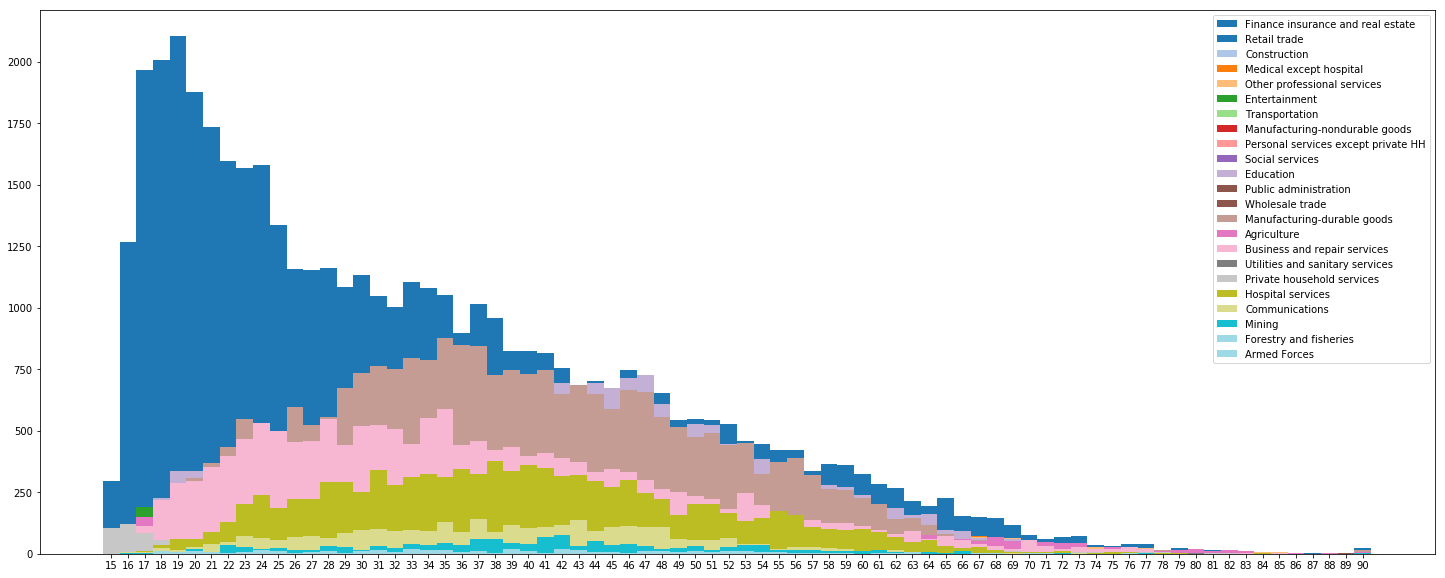

In [129]:
# setup stacked bar graph
%matplotlib inline

entry_range = list(age_range)

width = 1 
plt.figure(figsize=(25,10))
c_mapper = plt.cm.get_cmap('tab20', len(all_jobs))

# plt.yticks(np.arange(0, 22001, 100))

plots = []
for entry_n, job in enumerate(all_jobs):
    serie = plt.bar(entry_range, grouped_jobs[job], width, color=c_mapper(entry_n))
    plots.append((serie, job))

plt.legend([plot[0] for plot in plots], [plot[1] for plot in plots])

plt.show()
# todo: set cutoff to allow for better colour spread